<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Project Deep Learning

Buatlah model Deep Learning yang mampu mengklasifikasikan 20 kelas gambar dari dataset yang diberikan

## Instruksi Pengerjaan
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : `Project_Kelompok.ipynb`
 * misal kelompok kalian adalah kelompok `1_4`, 
 * maka nama file haruslah `Project_1_4.ipynb`
1. Lengkapi bagian kode
1. Berikan dokumentasi yang jelas pada setiap cell kode
---

## [TASK]  Rename File
<font color='red' size=5><pre>Rename File Colab sesuai instruksi</pre></font>

---

## Load Modul dan Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image



---
# Load Dataset

Proses ini akan mengunduh dataset gambar untuk kasus klasifikasi dengan 20 kelas berdasarkan dataset Pascal VOC 2007

## [TASK] Define input size

Rata-rata ukuran gambar adalah `(380, 470, 3)`

Untuk mengurangi komputasi dan memori yang digunakan, resize image menjadi ukuran yang lebih kecil

Tradeoffs:
* makin kecil gambar, akurasi bisa menurun
* makin besar gambar, makin berat di komputasi dan memori


<br>

<font color='red' size=5><pre>Definisikan ukuran citra yang akan digunakan!</pre></font>

In [ ]:
input_shape = (200, 200, 3)

## Load Dataset

In [ ]:
!wget 'https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py'

from project_data_loader import DataLoader

--2019-10-25 03:27:10--  https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2686 (2.6K) [text/plain]
Saving to: ‘project_data_loader.py’

project_data_loader 100%[===================>]   2.62K  --.-KB/s    in 0s      

2019-10-25 03:27:11 (77.8 MB/s) - ‘project_data_loader.py’ saved [2686/2686]



In [ ]:
loader = DataLoader(input_shape)
(X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = loader.load_data()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteXPR5V3/voc-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteXPR5V3/voc-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/voc/2007/4.0.0.incompleteXPR5V3/voc-validation.tfrecord


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/4.0.0. Subsequent calls will reuse this data.


In [ ]:
num_class = len(class_names)

print('terdapat',num_class,'kelas di dalam dataset')
print('daftar kelas:\n', class_names)


terdapat 20 kelas di dalam dataset
daftar kelas:
 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


Cek ukuran dataset


In [ ]:
print('terdapat',num_class,'kelas di dalam dataset')
print('daftar kelas:\n', class_names)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

terdapat 20 kelas di dalam dataset
daftar kelas:
 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
X_train.shape = (2825, 200, 200, 3)
y_train.shape = (2825,)

X_val.shape   = (2888, 200, 200, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, 200, 200, 3)
y_test.shape  = (2000,)



**harusnya kalian akan mendapatkan hasil**:
<pre>X_train.shape = (2825, ??, ??, 3)
y_train.shape = (2825,)

X_val.shape   = (2888,  ??, ??, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, ??, ??, 3)
y_test.shape  = (2000,)

di mana `??` akan sesuai dengan ukuran `input_shape`
</pre>

In [ ]:
X_test=X_test[:2000]

---
## [TASK] One-hot Label

<font color='red' size=5><pre>Ubah vektor y_train, y_val, dan y_test menjadi bentuk one hot matrix</pre></font>



In [ ]:
y_train_hot = to_categorical(y_train)
y_val_hot   = to_categorical(y_val)
y_test_hot  = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


**harusnya kalian akan mendapatkan hasil**:
<pre>y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)
</pre>

## View Dataset

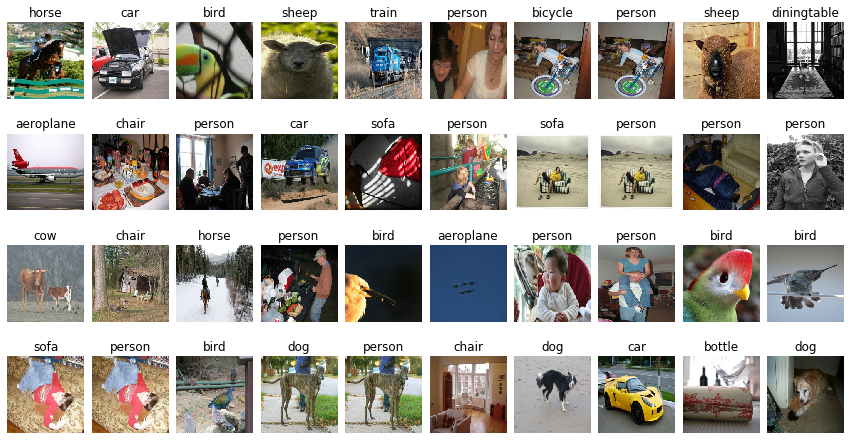

In [ ]:
fig, ax = plt.subplots(4,10,figsize=(15,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,4):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10,:,:,:])
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
# Classification Model

## [TASK] Create your own model
<font color='red' size=5><pre>Buatlah model klasifikasimu sendiri!!</pre></font>


Misalnya:
* load pretrain
* define new layers
* define trainable layers
* have fun

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
______________________________________________________________

In [ ]:
x = model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

myModel = Model(inputs=model.input, outputs=predictions, name='VGG Augmented')

## [TASK] Compile Model
<font color='red' size=5><pre>Compile modelmu dengan loss dan metrik pilihanmu!</pre></font>



In [ ]:
#myModel.compile(??)
for i, layer in enumerate(myModel.layers):
    print(i, layer.name)
	
for layer in myModel.layers[:15]: #freez 0 - 15 
    layer.trainable = False
for layer in myModel.layers[15:]: #dilatih 15 - fully connected
    layer.trainable = True
	
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)
myModel.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d
20 dense
21 dense_2
22 dense_3


---
# Data Preparation

## [TASK] Normalize Data

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Normalisasikan data jika diperlukan!</pre></font>


have fun

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## [TASK] Additional Scheme

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Tambahkan skema dan implementasi yang ingin kalian lakukan</pre></font>


Misalnya:
* Data Augmentation
* Custom training function
* Checkpoint
* Learning Rate Annealing
* have fun

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(X_train)

---
# Train and Testing




## [TASK] Train the Model
<font color='red' size=5><pre>Latih modelmu! <br>Definisikanlah batch size dan epoch!!<br>Gunakan data validasi</pre></font>

In [ ]:
batch_size= 200
epochs = 20

In [ ]:
history = myModel.fit_generator(datagen.flow(X_train, y_train_hot,
                                batch_size=batch_size), 
                                epochs=epochs,
                                validation_data = (X_val, y_val_hot))

Epoch 1/20
14/15 [===========================>..] - ETA: 2s - loss: 3.0908 - acc: 0.2335Epoch 1/20
2888/15 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Plot History Training

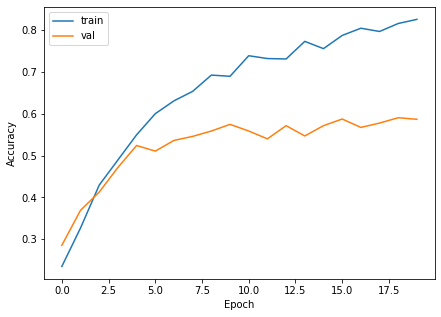

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## [TASK] Evaluasi Model
<font color='red' size=5><pre>Evaluasikan modelmu pada data test</pre></font>


In [ ]:
scores = myModel.evaluate(X_test, y_test_hot, verbose=1)

2000/2000 [==============================] - 19s 10ms/sample - loss: 1.5225 - acc: 0.5835


In [ ]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 1.5224754571914674
Test accuracy: 58.35%


---
# Save Model


## [TASK] Save model into .h5 file

<font color='red' size=5><pre>Simpan model terbaikmu dengan nama file 'model_kelompok.h5'</pre></font>

* misal kelompok kalian adalah kelompok `3_2`,
* maka nama file model haruslah `model_3_2.h5`

In [ ]:
# Save entire model to a HDF5 file
myModel.save('model_3_3.h5')

## [TASK] Download model


<font color='red' size=5><pre>Download modelmu dari tab `Files`</pre></font>

## [TASK] Upload model


<font color='red' size=5><pre>Upload modelmu ke suatu storage cloud,<br>Kumpulkan link di google sheet daftar kelompok</pre></font>

## [TASK] Share File Colab


<font color='red' size=5><pre>Share dan Set file colaboratory ini agar bisa dilihat oleh orang lain<br>
Copy link file colaboratory
Lalu kumpulkan link di google sheet daftar kelompok</pre></font>

---
# Menguji Pada Image Dari Internet

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>tambahkan 5 gambar baru, dan coba modelmu terhadap gambar tersebut</pre></font>

* Search Gambar di Internet (Google Image)
* Copy Image Address
* Paste Image Address ke cell di bawah

In [ ]:
!wget -O 'data_test_0.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSrCSuQE0pUoPM6iPyXBdKjPi-C632rckUoSDirxNUF1Tb1fPNQ'
!wget -O 'data_test_1.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQK06h_ozCheXqwvfx1YHsKc_009kKR9WN17RbwQECPQJFFvlhq'
!wget -O 'data_test_2.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRdyaVZVb7MKSf1XmNiVoeI_oLr08ft-DxwFrvYNWryw5vHJoea'
!wget -O 'data_test_3.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSpVd852pnCgZ6OwC3E0mIcjKRJpzulPYWYJd4Zp7nirUduQ_m4'
!wget -O 'data_test_4.jpg' 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQFhGAVukWlGc7jdvwy4h9G0Bcq-mQv_VYbKxy_youfKqIWdjYd'

--2019-10-24 08:13:02--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSrCSuQE0pUoPM6iPyXBdKjPi-C632rckUoSDirxNUF1Tb1fPNQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.140.102, 74.125.140.100, 74.125.140.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.140.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60528 (59K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]  59.11K  --.-KB/s    in 0s      

2019-10-24 08:13:02 (122 MB/s) - ‘data_test_0.jpg’ saved [60528/60528]

--2019-10-24 08:13:05--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQK06h_ozCheXqwvfx1YHsKc_009kKR9WN17RbwQECPQJFFvlhq
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.206.138, 74.125.206.113, 74.125.206.139, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.206.138|:443... connected.
HTTP request sent, awai

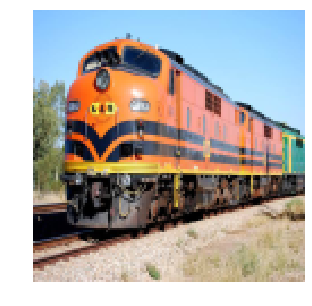

id kelas prediksi 18
kelas prediksi train


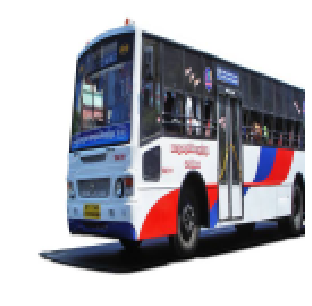

id kelas prediksi 5
kelas prediksi bus


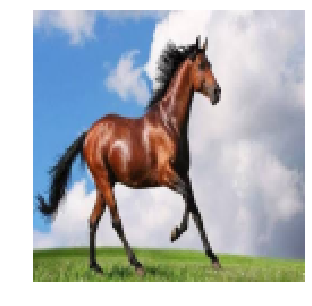

id kelas prediksi 12
kelas prediksi horse


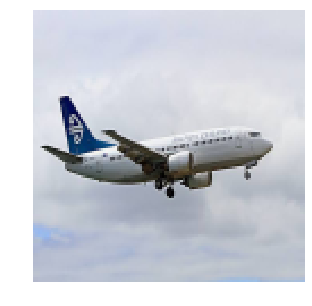

id kelas prediksi 0
kelas prediksi aeroplane


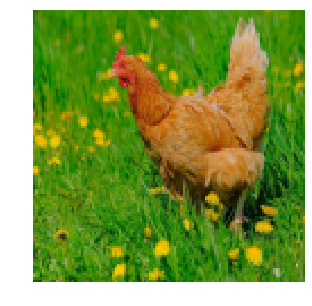

id kelas prediksi 2
kelas prediksi bird


In [ ]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0)
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('id kelas prediksi',class_id)
  print('kelas prediksi', class_names[class_id])

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>